In [1]:
push!(LOAD_PATH, ".")
using FFTWtoolkit, FFTW
using LinearAlgebra
using HDF5, DelimitedFiles
using PyPlot

In [2]:
#arxname="../JLDFiles/Desinhibida/180116s1/180116s1cut_evento_1.h5"
arxname="/home/karel/BRWFiles/Isabel/Cacho_13_190531_CTRL_R1_Rtn_EMAD.h5"

"/home/karel/BRWFiles/Isabel/Cacho_13_190531_CTRL_R1_Rtn_EMAD.h5"

In [3]:
arx=h5open(arxname)

HDF5 data file: /home/karel/BRWFiles/Isabel/Cacho_13_190531_CTRL_R1_Rtn_EMAD.h5

In [4]:
names(arx)

7-element Array{String,1}:
 "CanalesSaturados"
 "Canalesrespuesta"
 "cols"            
 "freq"            
 "intervalo"       
 "lfp"             
 "rengs"           

Todos los tiempos estan en cuadros, esto es, en 1/freq de segundo. Para las transformadas de Fourier (o graficas bonitas) tenemos que multiplicar los rangos por los factores adecuados.

In [5]:
lfp=read(arx, "lfp")
saturados=read(arx, "CanalesSaturados")
buenos=read(arx, "Canalesrespuesta")
freq=read(arx, "freq")
#late=read(arx, "latencia")
#fin=read(arx,"final")
#retrazo=read(arx,"retrazo")
#println(freq, " ", late, " ", fin , " ", retrazo )

17.85550205219098

In [6]:
nmax=size(lfp)[3]

51016

In [7]:
iniact=retrazo+late # Retrazo + latencia = inicio de señal

UndefVarError: UndefVarError: retrazo not defined

In [8]:
#rango=iniact:fin
#mejor contamos desde cero, no? el momento cero es el inicial (aunque el indice no)!!!
rango=1:nmax

1:51016

In [9]:
buenos

294×2 Array{Int64,2}:
  3   3
 39  62
 55  38
 11  29
  6  42
 38  61
 53  22
 24  40
 28  29
 54  60
  6  18
  4  43
 52  61
  ⋮    
 34  28
 29  54
 40  62
 31  36
  7  45
 51  31
 23  33
 47  40
 36  52
 35  24
  6  29
 11  36

In [10]:
saturados #terrible wring

392×2 Array{Int64,2}:
 11  40
 34   7
 61  48
 30   4
 55  35
 40  52
 42  38
 40  53
 23  32
 42  27
 43  38
  5  49
  5  57
  ⋮    
 54  11
 45  12
 64  64
 38  42
 39  61
 44  26
 22  38
 59  36
  9  44
 41   3
 44  28
 49   4

In [58]:
ejemplolfp=lfp[1,1,:];

In [12]:
tmax=nmax/freq
rangotiempos=(rango.-1)./freq
rangofreqs=(rango.-1)./tmax
rfreqsim=map(x->-freq/2+(x-1)*freq/(nmax-1),rango);
rfreqsim[div(nmax,2)+1]

0.00017500247037283145

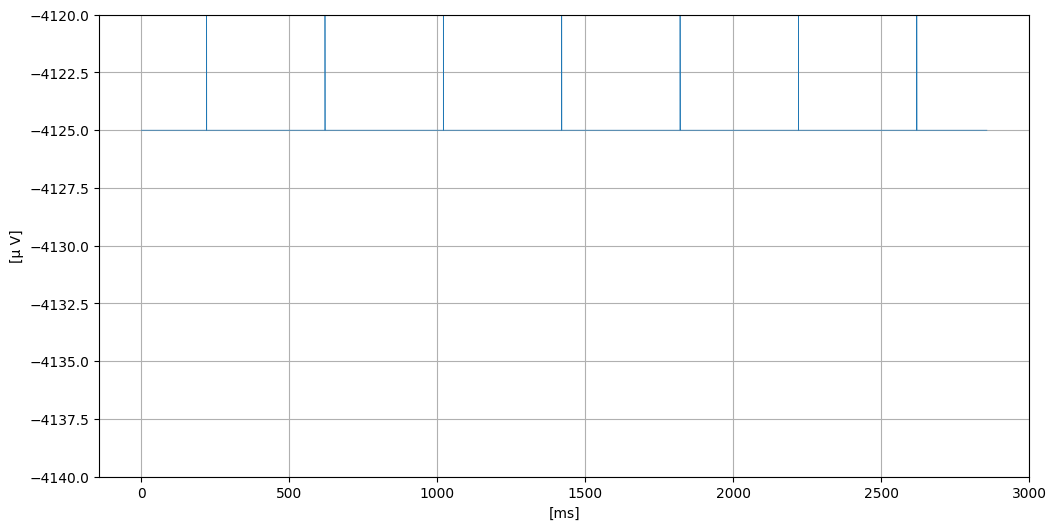

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa940f137b8>

In [63]:
figura=figure(figsize=(12,6))
grid()
#xlim(120,170)
ylim(-4140,-4120)
xlabel("[ms]")
ylabel("[μ V]")
plot(rangotiempos, ejemplolfp, lw=0.5)

In [14]:
plan=plan_fft(ejemplolfp,  flags=FFTW.PATIENT)
fttotal=(plan*ejemplolfp);
ftsym=circshift(fttotal, div(nmax,2));

In [38]:
invplan=plan_ifft(fttotal;

LoadError: syntax: incomplete: premature end of input

In [21]:
epoder=map(abs2, ftsym)
unsymepoder=map(abs2, fttotal)
   # poderfiltrado=map(abs2, rara2);

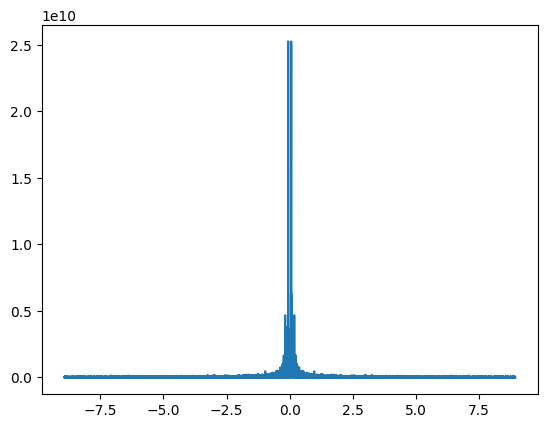

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa9800e3d68>

In [16]:
plot(rfreqsim,epoder)

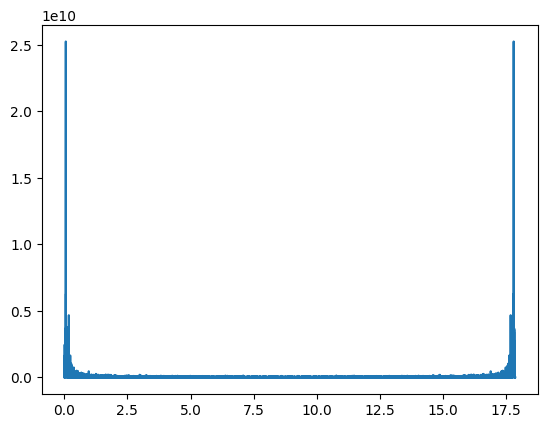

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa98b5ee550>

In [22]:
plot(rangofreqs, unsymepoder)

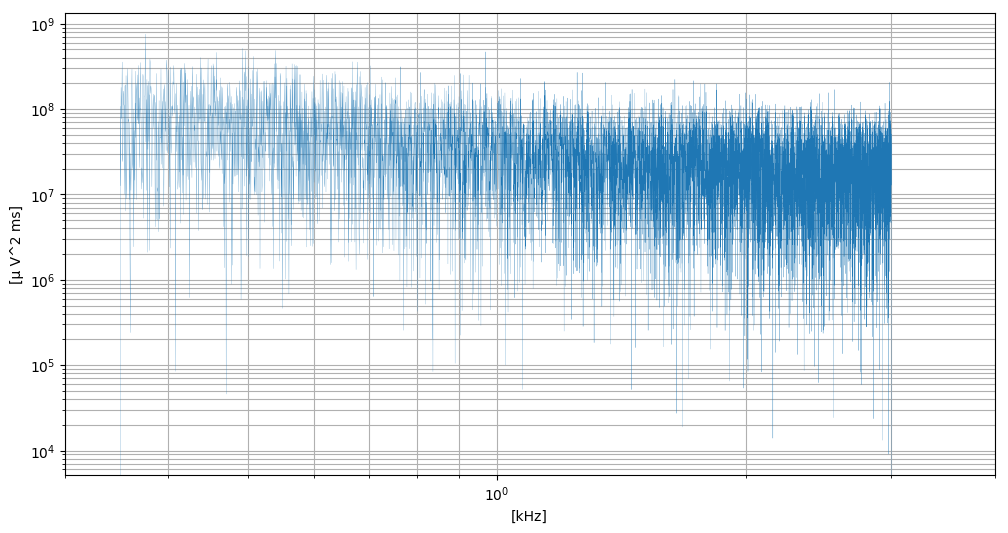

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa9427ea828>

In [36]:
figura=figure(figsize=(12,6))
grid(which="both")
xlim(+0.3,4)
xlabel("[kHz]")
ylabel("[μ V^2 ms]")
yscale("log")
xscale("log")
#xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
#yscale("log")
mediorango=1:500
plot(rangofreqs,unsyfiltr, lw=0.15)
#plot(rangofreqs[mediorango],epoder2[mediorango])

In [30]:
rara2=filtrobanda(rangofreqs, fttotal, 0.350,3);  #esto seria la banda theta

In [31]:
unsyfiltr=map(abs2, rara2);

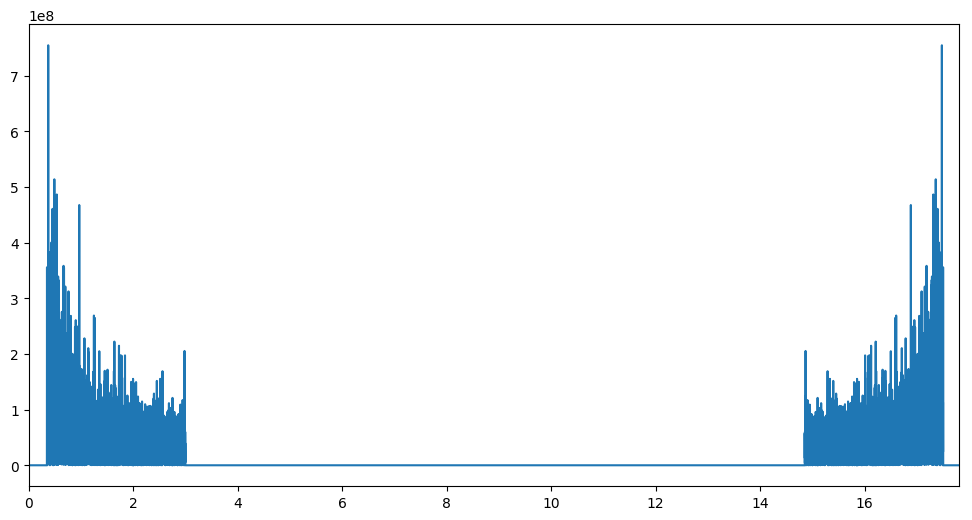

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa9428214a8>

In [40]:
figura=figure(figsize=(12,6))
xlim(0,17.8)
plot(rangofreqs, unsyfiltr)

In [44]:
exfiltrado=real.(invplan*rara2);

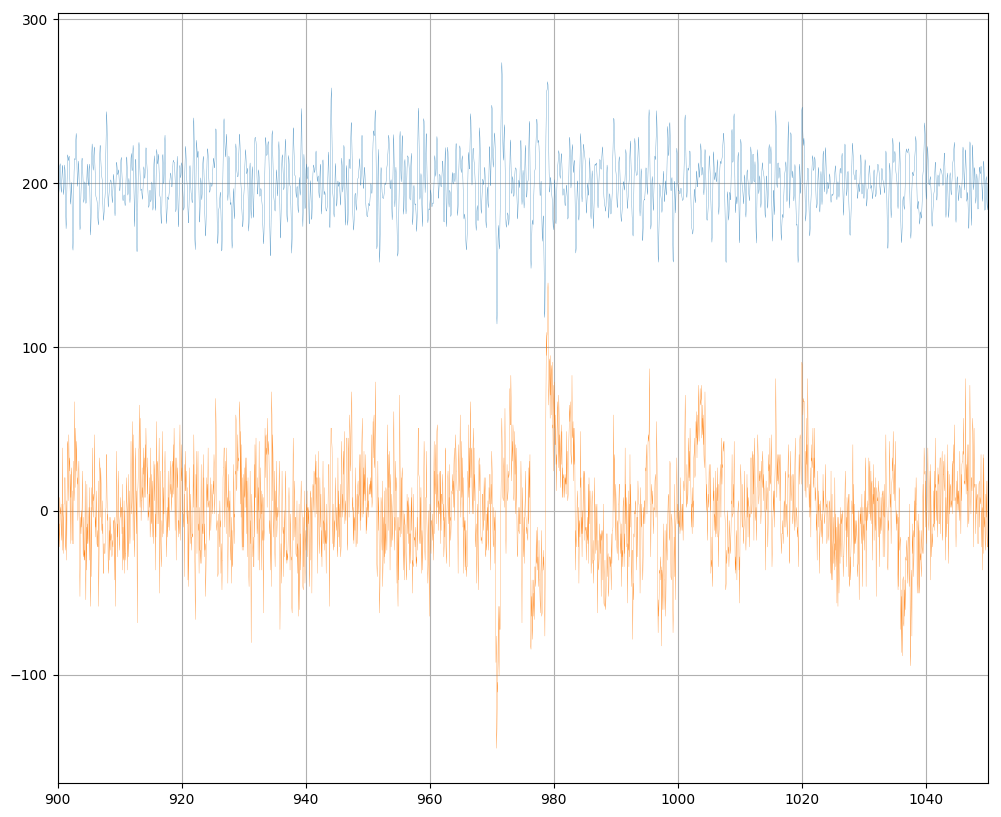

In [57]:
figura=figure(figsize=(12,10))
xlim(900,1050)

plot(rangotiempos, exfiltrado.+200, lw=0.2)
plot(rangotiempos, ejemplolfp, lw=0.2)
grid()

Muy bien, hasta ahí parece funcionar. Hay que checar que esto también jale con indices pares. Ahora aplicamos a esto a los datos completos.

In [ ]:
ffTotalTotal=zeros(Complex, 64, 64, nmax);
for j=1:64, k=1:64
    ffTotalTotal[j,k,:]=plan*vec(lfp[j,k,:])
end

In [ ]:
# = funciones auxiliares para bandas "ineteresantes =#
fbajas(datos)=filtrobanda(rangofreqs,datos, 0.010, 0.060)
fmedias(datos)=filtrobanda(rangofreqs, datos, 0.1, 0.2)
faltas(datos)=filtrobanda(rangofreqs, datos, 0.2, 0.3)
faltotas(datos)=filtrobanda(rangofreqs, datos, 0.3, 0.45)

In [ ]:
fdelta(datos)=filtrobanda(rangofreqs,datos, 0.0001, 0.0035)
ftheta(datos)=filtrobanda(rangofreqs, datos, 0.0035, 0.007022)
falpha(datos)=filtrobanda(rangofreqs, datos, 0.007022, 0.014044)
fbeta(datos)=filtrobanda(rangofreqs, datos, 0.014044, 0.035120)
fgamma(datos)=filtrobanda(rangofreqs, datos, 0.035120, 0.100)
fspr(datos)=filtrobanda(rangofreqs, datos, 0.100, 0.250)
fuspr(datos)=filtrobanda(rangofreqs, datos, 0.250, 0.600)

Las unidades son un relajo. Tenemos que $V^2 \cdot s$ ( Volts cuadrados por segundos ) son Joules entre Coulombs. La transformada de Fourier esta en $ V \cdot s$, Volts segundos. Al cuadrar y multiplicar por $ d \omega$,nos da otra vez $ V^2 s$ que esta bien. Pero nuestra señal esta en $mV \cdot ms$. Eso da que la Transformada de Fourier está en $10^{-6} Vs$. Al cuadrar queda en $10^{-12}$, y nuestra $d \omega$ esta en kHz. Por ende el resultado de la integral esta en $10^{-9} J/C$.

In [ ]:
factor=10^9
poderbajo=zeros(Real, 64,64)
podermedio=zeros(Real, 64,64)
poderalto=zeros(Real, 64,64)
poderaltote=zeros(Real, 64,64)
for j=1:64, k=1:64
    aux=fbajas(ffTotalTotal[j,k,:])
    poderbajo[j,k]=convert(Real, dot(aux,aux))/factor
    aux=fmedias(ffTotalTotal[j,k,:])
    podermedio[j,k]=convert(Real, dot(aux,aux))/factor
    aux=faltas(ffTotalTotal[j,k,:])
    poderalto[j,k]=convert(Real, dot(aux,aux))/factor
    aux=faltotas(ffTotalTotal[j,k,:])
    poderaltote[j,k]=convert(Real, dot(aux,aux))/factor
end

In [ ]:
poderdelta=zeros(Real,64,64)
podertheta=zeros(Real,64,64)
poderalpha=zeros(Real,64,64)
poderbeta=zeros(Real,64,64)
podergamma=zeros(Real,64,64)
poderspr=zeros(Real,64,64)
poderuspr=zeros(Real,64,64);

In [ ]:
listapoder=(poderdelta,podertheta, poderalpha,poderbeta,podergamma,poderspr,poderuspr)
listaf=(fdelta, ftheta, falpha, fbeta, fgamma, fspr, fuspr)

In [ ]:
ll=zip(listapoder, listaf)
for (p,f) in ll
    for j=1:64, k=1:64
    aux=f(ffTotalTotal[j,k,:])
    p[j,k]=convert(Real, dot(aux,aux))/factor
    end
end

In [ ]:
extrema(podergamma)

In [ ]:
saturados

In [ ]:
satux=saturados[:,2]
satuy=saturados[:,1]
bonsx=buenos[:,2]
bonsy=buenos[:,1];

In [ ]:
farofa, lista =subplots(2,2, figsize=(10,10))

(pmin, pmax)= (0, 2)

exten=[0.5,64.5,0.5,64.5]

lista[1,1][:imshow](poderbajo, vmin=pmin, vmax=pmax, origin="lower", cmap="magma")
lista[1,1][:title][:set_text]("10~60Hz")

lista[1,2][:imshow](podermedio, vmin=pmin, vmax=pmax, origin="lower", cmap="magma")
lista[1,2][:title][:set_text]("100~200Hz")

lista[2,1][:imshow](poderalto, vmin=pmin, vmax=pmax, origin="lower", cmap="magma")
lista[2,1][:title][:set_text]("200~300Hz")

lista[2,2][:imshow](poderaltote, vmin=pmin, vmax=pmax, origin="lower", cmap="magma", extent=exten)
lista[2,2][:title][:set_text]("300~450Hz")

scatter(bonsx, bonsy, marker="o", c="red", s=0.4)
scatter(satux, satuy, marker="x", c="cyan", s=20)


#farofa[:colorbar](lista[2,2], ax=lista, orientation="horizontal", fraction=.1)

savefig("EspectrosdePoderporBandasArbitrarias.png", dpi=90)

#colorbar()

In [ ]:
farofa, lista =subplots(4,2, figsize=(10,14))

(pmin, pmax)= (0, 2)

exten=[0.5,64.5,0.5,64.5]

lista[1,1][:imshow](poderdelta, vmin=pmin, vmax=pmax, origin="lower", cmap="magma")
lista[1,1][:title][:set_text]("δ Band")

lista[1,2][:imshow](podertheta, vmin=pmin, vmax=pmax, origin="lower", cmap="magma")
lista[1,2][:title][:set_text]("θ Band")

lista[2,1][:imshow](poderalpha, vmin=pmin, vmax=pmax, origin="lower", cmap="magma")
lista[2,1][:title][:set_text]("α Band")

lista[2,2][:imshow](poderbeta, vmin=pmin, vmax=pmax, origin="lower", cmap="magma", extent=exten)
lista[2,2][:title][:set_text]("β Band")

lista[3,1][:imshow](podergamma, vmin=pmin, vmax=pmax, origin="lower", cmap="magma", extent=exten)
lista[3,1][:title][:set_text]("γ Band")

lista[3,2][:imshow](poderspr, vmin=pmin, vmax=pmax, origin="lower", cmap="magma", extent=exten)
lista[3,2][:title][:set_text]("SPR Band")

lista[4,1][:imshow](poderuspr, vmin=pmin, vmax=pmax, origin="lower", cmap="magma", extent=exten)
lista[4,1][:title][:set_text]("USPR Band")

lista[4,2][:set_aspect]("equal")
lista[4,2][:scatter](bonsx, bonsy, marker="o", c="red", s=0.4)
lista[4,2][:scatter](satux, satuy, marker="x", c="cyan", s=20)


#farofa[:colorbar](lista[2,2], ax=lista, orientation="horizontal", fraction=.1)

savefig("EspectrosdePoderporBandasTradicionales.png", dpi=90)

#colorbar()

In [ ]:
skt=wfft(ejemplolfp, 350);
ranguitof=(0:349).*(freq/350)

In [ ]:
epoder=map(abs2, skt)./factor;

In [ ]:
extrema(epoder), size(epoder)

In [ ]:
f=figure(figsize=(10,10))
#xlim(0,2)
#axis("off")

fmax=size(epoder)[2]
datossym=circshift(epoder, (0,div(fmax,2)))

for j=1:2:(350)
    datos=vec(datossym[:,j+1]).+(j*0.0001)
    plot(datos, lw=0.2, c="black")
end

#savefig("texturadefrequenciasa01.png", dpi=90)


In [ ]:
f=figure(figsize=(10,10))

(twmax , fwmax)= size(datossym)

twmax=twmax/freq
fwmax=freq

(pmin,pmax)=extrema(datossym)

ylim(-0.5,.5)

extento=[0,twmax,-fwmax/2,fwmax/2]

bla=permutedims(datossym, [2,1])

imshow(bla, origin="lower", cmap="gnuplot", extent=extento, aspect=80, vmin=pmin, vmax=0.5*pmax)

In [ ]:

(cmax, smax)=size(skt)

poderwindowgamma=zeros(cmax)
poderwindowalpha=zeros(cmax)
poderwindowbeta=zeros(cmax)
poderwindowspr=zeros(cmax)


for j=1:cmax
    aux=fgamma(skt[j,:])
    poderwindowgamma[j]=dot(aux, aux)
    
    aux=falpha(skt[j,:])
    poderwindowalpha[j]=dot(aux, aux)

    aux=fbeta(skt[j,:])
    poderwindowbeta[j]=dot(aux, aux)

    aux=fspr(skt[j,:])
    poderwindowspr[j]=dot(aux, aux)
    
end


In [ ]:
figura=figure(figsize=(10,4))
trange=(1:cmax)./freq

plot(trange,poderwindowalpha, label="α")
plot(trange,poderwindowbeta, label="β")
plot(trange,poderwindowgamma, label="γ")
plot(trange,poderwindowspr, label="SPR")

legend()


In [ ]:
podergammaventana=zeros(64,64,cmax)

cvent=350
cmax=nmax-cvent
podergammaventana=zeros(64,64,cmax)


@time for j=1:64, k=1:64
   wtaux=wfft(lfp[j,k,:], cvent)
   for t=1:cmax
        auxfilt=fgamma(wtaux[t,:])
        podergammaventana[j,k,t]=dot(auxfilt,auxfilt)
    end
    
end


In [ ]:
function podpromediobanda(datos::Array, cventana=350, banda="gamma")
    
nmax=size(datos)[3]    
cmax=nmax-cventana
    
result=zeros(64,64,cmax)

dictfiltros=Dict("alpha"=>falpha, "beta"=>fbeta, 
        "gamma"=>fgamma, "theta"=>ftheta, 
        "delta"=>fdelta, "spr"=>fspr, "uspr"=>fuspr )          

filt=dictfiltros[banda]
    
for j=1:64, k=1:64
   wtaux=wfft(lfp[j,k,:], cventana)
   for t=1:cmax
        auxfilt=filt(wtaux[t,:])
        result[j,k,t]=dot(auxfilt,auxfilt)
    end
return resul

end


In [ ]:
imshow(podergammaventana[:,:,100], origin="lower", vmin=0, vmax=0.1)

In [ ]:
h5write("podergammatest.h5", "poder/podergammaventana", podergammaventana)

In [ ]:
extrema(podergammaventana[:,:,100])

In [ ]:
@everywhere

In [ ]:
ioff()

pmin=0
pmax=0.1


for t=1:cmax
    ioff()
    fff=figure(figsize=(4,4))
    imshow(podergammaventana[:,:,t], origin="lower", vmin=pmin, vmax=pmax)
    nome="tratando-$t.png"
    savefig(nome,dpi=90)
end

In [ ]:
for t=1:4
    println("bla $t")
end

In [ ]:
a,b=size(epoder)
xx=collect(1:a)
yy=collect(1:b);

xxs=repeat(xx,outer=(1,b))
yys=permutedims(repeat(yy, outer=(1,a)))

xxs=xxs./freq
yys=yys.*(freq/350)

#plot_wireframe(xxs, yys, epoder)

In [ ]:
xxs

In [ ]:
f=figure(figsize=(15,15))
ylim(0,3.5)
xlabel("Tiempo ms")
ylabel("frequencia kHz")
zlabel("Poder J/C")
plot_surface(xxs[:,1:170], yys[:,1:170], epoder[:,1:170], lw=0.5)

In [ ]:
?view

In [ ]:
figura=figure(figsize=(13,10))
grid()
#xlim(120,170)
xlabel("[ms]")
ylabel("[μ V]")
#plot(rangotiempos, signalfiltrad, lw=1.5)
plot(rangotiempos, signalfiltrad2, lw=1.5)
#plot(rangotiempos, signalfiltrad+signalfiltrad2, lw=1.65)
plot(rangotiempos, ejemplolfp, lw=0.3)


In [ ]:
a=0.053022
tol=2*step(rangofreqs)
q(x)=isapprox(a,x, atol=tol)
findfirst(q, rangofreqs)


In [ ]:
rangofreqs[12:17]

In [ ]:
map(q, rangofreqs[12:17])

In [ ]:
collect(rangofreqs[12:17])

In [ ]:
step(rangofreqs)

In [ ]:
a=0.005
p=indicecercano(a, rangofreqs)

In [ ]:
rangofreqs[2]

In [ ]:
rangofreqs[57]

In [ ]:
figura=figure(figsize=(12,6))
grid()
xlabel("[kHz]")
ylabel("[μ V^2]")
plot(subfreqs,epoder2)